<a href="https://colab.research.google.com/github/ariadnecs/Curso-IA-para-todos/blob/master/BCB_todos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[SGS - Sistema Gerenciador de Séries Temporais - Banco Central do Brasil](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries)

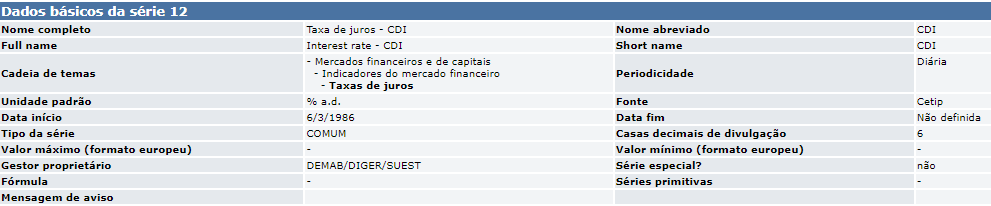

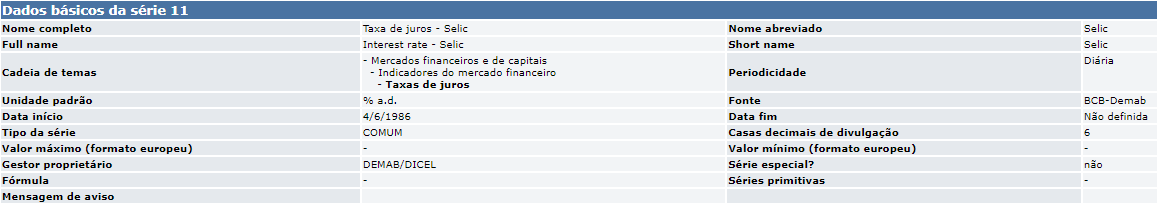

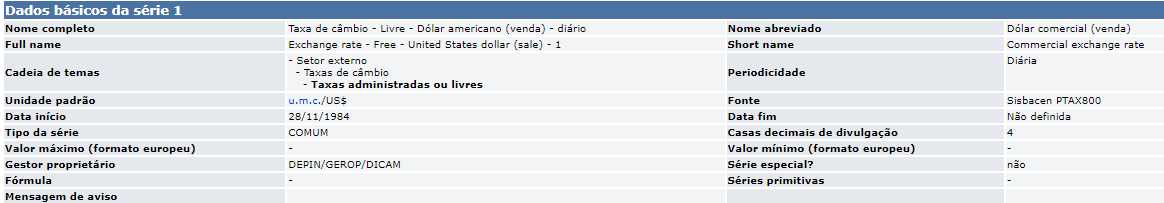

[json_serie-sgs-25479](https://dadosabertos.bcb.gov.br/dataset/25479-taxa-media-mensal-de-juros-das-operacoes-de-credito-com-recursos-livres---pessoas-fisicas---c/resource/3f1d3708-b582-424b-9a23-35044a558df4)

####Extraindo dados do Banco Central

Fonte:

[Extraindo dados do Banco Central usando o Python](https://www.youtube.com/watch?v=mI8GMj3GzAE)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# criar uma função com o código como argumento
def bcb(codigo):

    link_bcb = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    df = pd.read_json(link_bcb)
    # redefinindo index
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    
    return df

####Criando Bases de Dados com as Taxas do BCB

In [ ]:
# 12 - Taxa de juros - CDI
cdi = bcb(12)

# 1 - Taxa de câmbio - Livre - Dólar americano (venda) - diário
tx_cambio_livre = bcb(1)

# 11 Taxa de juros - Selic
selic = bcb(11)

In [ ]:
tx_cambio_livre.info(), cdi.info(), selic.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    9172 non-null   datetime64[ns]
 1   valor   9172 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8838 entries, 0 to 8837
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    8838 non-null   datetime64[ns]
 1   valor   8838 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    8797 non-null   datetime64[ns]
 1   valor   8797 non-null   float64       
dtypes: datetime64[ns](1), float

(None, None, None)

Quantidade de dados>

*   tx_cambio_livre > cdi > selic

Isso se deve à data de início da coleta dos dados

#####Renomear a coluna 'valor' de todas as bases

In [ ]:
cdi_ren = cdi.copy()
cdi_ren.rename(columns={'valor': 'cdi'}, inplace = True)
cdi_ren

,data,cdi
0,1986-03-06,0.068111
1,1986-03-10,0.069028
2,1986-03-12,0.067417
3,1986-03-14,0.064584
4,1986-03-17,0.068222
...,...,...
8833,2021-07-02,0.016137
8834,2021-07-05,0.016137
8835,2021-07-06,0.016137
8836,2021-07-07,0.016137


In [ ]:
cdi_ren['data'].dt.month.value_counts()

7     781
8     774
5     758
3     757
6     747
10    747
1     747
12    741
9     725
4     713
11    701
2     647
Name: data, dtype: int64

In [ ]:
selic_ren = selic.copy()
selic_ren.rename(columns={'valor': 'selic'}, inplace = True)
selic_ren

,data,selic
0,1986-06-04,0.065041
1,1986-06-05,0.067397
2,1986-06-06,0.066740
3,1986-06-09,0.068247
4,1986-06-10,0.067041
...,...,...
8792,2021-07-05,0.016137
8793,2021-07-06,0.016137
8794,2021-07-07,0.016137
8795,2021-07-08,0.016137


In [ ]:
selic_ren['data'].dt.month.value_counts()

7     782
8     774
12    749
3     748
10    747
1     747
6     745
5     738
9     725
11    701
4     692
2     649
Name: data, dtype: int64

In [ ]:
tx_cambio_livre_ren = tx_cambio_livre.copy()
tx_cambio_livre_ren.rename(columns={'valor': 'tx_cambio_livre'}, inplace = True)
tx_cambio_livre_ren

,data,tx_cambio_livre
0,1984-11-28,2828.0000
1,1984-11-29,2828.0000
2,1984-11-30,2881.0000
3,1984-12-03,2881.0000
4,1984-12-04,2881.0000
...,...,...
9167,2021-07-05,5.0749
9168,2021-07-06,5.1645
9169,2021-07-07,5.2328
9170,2021-07-08,5.2587


In [ ]:
tx_cambio_livre_ren['data'].dt.month.value_counts()

7     806
8     796
1     791
12    789
3     785
5     780
10    770
6     768
9     746
4     733
11    724
2     684
Name: data, dtype: int64

####Unindo as bases

In [ ]:
bcb = pd.merge(cdi_ren, selic_ren, on = 'data')
bcb = pd.merge(bcb, tx_cambio_livre_ren, on = 'data')
bcb

,data,cdi,selic,tx_cambio_livre
0,1986-06-04,0.071556,0.065041,13.8400
1,1986-06-05,0.073139,0.067397,13.8400
2,1986-06-06,0.073584,0.066740,13.8400
3,1986-06-09,0.075222,0.068247,13.8400
4,1986-06-10,0.074806,0.067041,13.8400
...,...,...,...,...
8777,2021-07-02,0.016137,0.016137,5.0293
8778,2021-07-05,0.016137,0.016137,5.0749
8779,2021-07-06,0.016137,0.016137,5.1645
8780,2021-07-07,0.016137,0.016137,5.2328


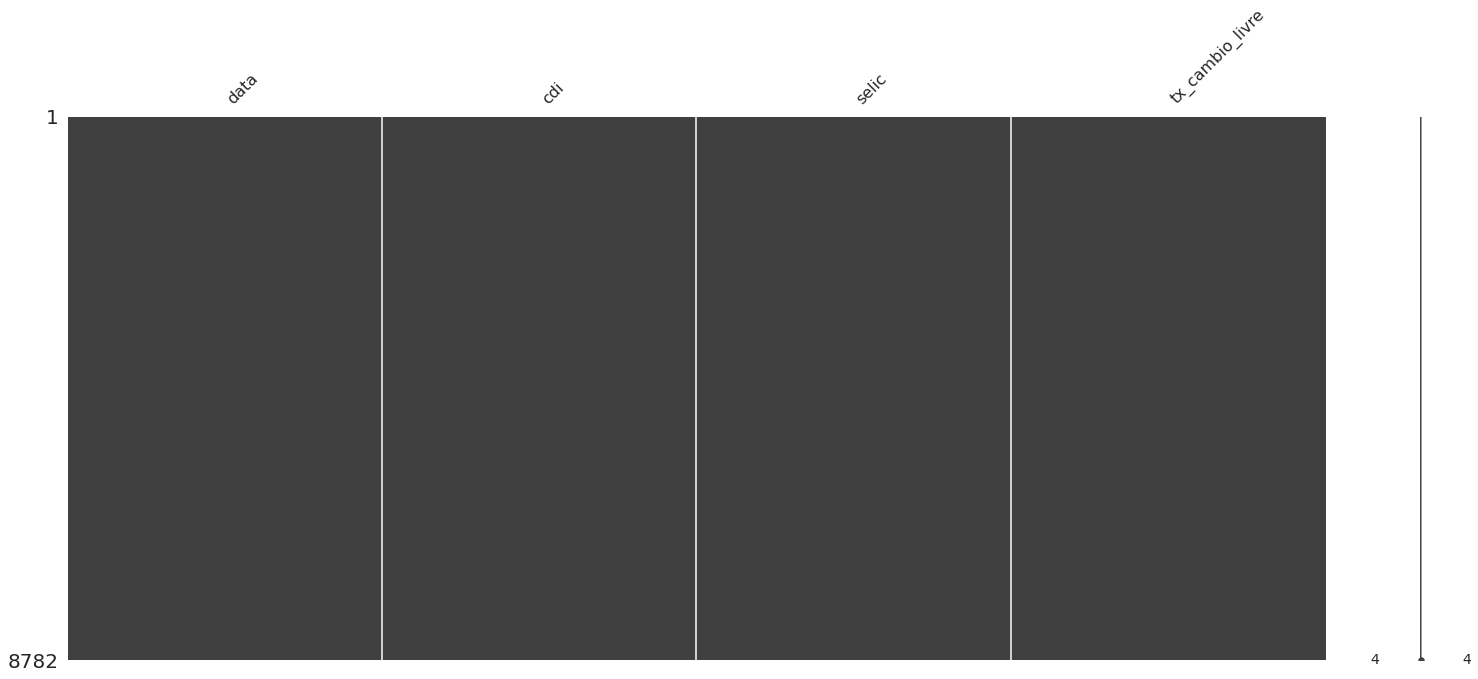

In [ ]:
matriz = msno.matrix(bcb)

In [ ]:
bcb.isnull().sum()

data               0
cdi                0
selic              0
tx_cambio_livre    0
dtype: int64

In [ ]:
bcb.to_excel('/content/drive/MyDrive/00_Adglow/BCB/bcb.xlsx')

####Explorando a base de dados 'bcb'

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
bcb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8782 entries, 0 to 8781
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             8782 non-null   datetime64[ns]
 1   cdi              8782 non-null   float64       
 2   selic            8782 non-null   float64       
 3   tx_cambio_livre  8782 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 343.0 KB


In [ ]:
bcb.head()

,data,cdi,selic,tx_cambio_livre
0,1986-06-04,0.071556,0.065041,13.84
1,1986-06-05,0.073139,0.067397,13.84
2,1986-06-06,0.073584,0.066740,13.84
3,1986-06-09,0.075222,0.068247,13.84
4,1986-06-10,0.074806,0.067041,13.84


In [ ]:
print("Mean of heights =\n", bcb.mean()) # média
print("Standard Deviation of height =\n", bcb.std()) # desvio padrão
print("Minimum height =\n", bcb.min()) # mínimo
print("Maximum height =\n", bcb.max()); # máximo

Mean of heights =
 cdi                  0.284488
selic                0.277455
tx_cambio_livre    717.741193
dtype: float64
Standard Deviation of height =
 cdi                   0.499712
selic                 0.490441
tx_cambio_livre    4830.557378
dtype: float64
Minimum height =
 data               1986-06-04 00:00:00
cdi                           0.007469
selic                         0.007469
tx_cambio_livre                  0.829
dtype: object
Maximum height =
 data               2021-07-08 00:00:00
cdi                            3.97067
selic                            3.626
tx_cambio_livre                  71153
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
bcb.describe()

,cdi,selic,tx_cambio_livre
count,8782.000000,8782.000000,8782.000000
mean,0.284488,0.277455,717.741193
std,0.499712,0.490441,4830.557378
min,0.007469,0.007469,0.829000
25%,0.041028,0.041099,1.804125
50%,0.063255,0.063441,2.475700
75%,0.152180,0.147472,4.199325
max,3.970667,3.626000,71153.000000


In [ ]:
# calculando a quantidade de valores únicos em cada coluna
def valores_unicos(base):
    
    val_unicos_base = {}
    for coluna in base.columns:
      val_unicos_base.update({coluna : int(len(base[coluna].unique()))})
      
    return pd.DataFrame([val_unicos_base])


In [ ]:
bcb_val_uni = valores_unicos(bcb)
bcb_val_uni

,data,cdi,selic,tx_cambio_livre
0,8782,2987,2608,7461


In [ ]:
corr_bcb = bcb.corr()

In [ ]:
corr_bcb

,cdi,selic,tx_cambio_livre
cdi,1.000000,0.991467,0.294649
selic,0.991467,1.000000,0.299546
tx_cambio_livre,0.294649,0.299546,1.000000


> Estatísticamente Selic e CDI são a mesma coisa.

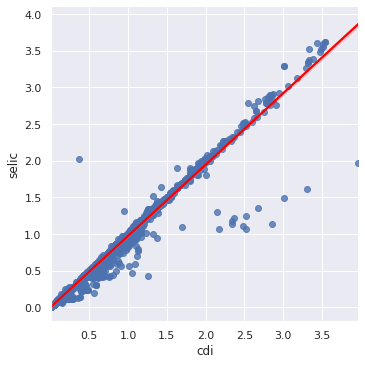

In [ ]:
sns.lmplot(data= bcb, x='cdi', y='selic', line_kws={'color': 'red'}); 

In [ ]:
import seaborn as sns
import matplotlib

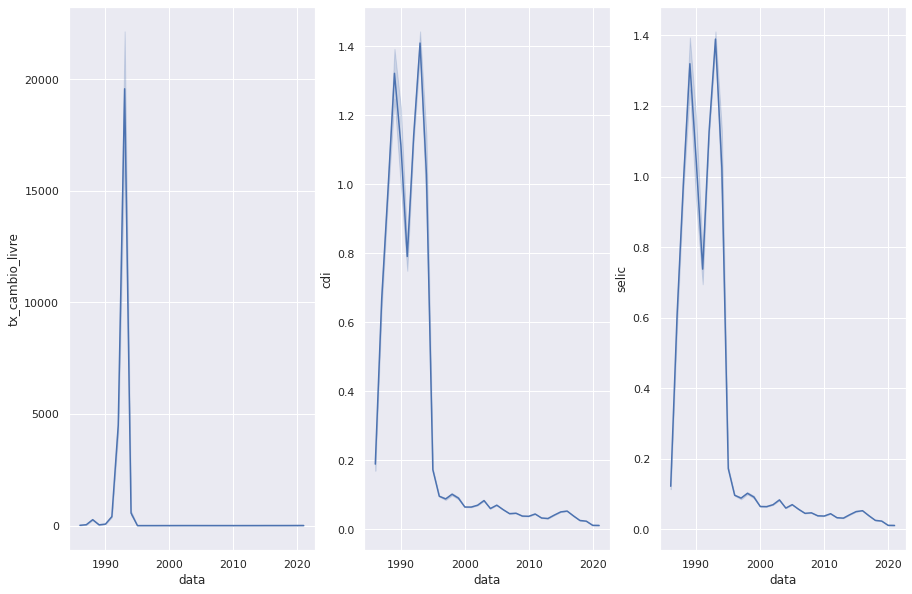

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
sns.lineplot(data = bcb, x = bcb.data.dt.year, y = "tx_cambio_livre")

plt.subplot(1, 3, 2)
sns.lineplot(data = bcb, x = bcb.data.dt.year, y = "cdi")

plt.subplot(1, 3, 3)
sns.lineplot(data = bcb, x = bcb.data.dt.year, y = "selic")

####Filtro a partir do ano 2000

In [ ]:
bcb_2000 = bcb.copy()
bcb_2000 = bcb_2000.loc[bcb_2000.data.dt.year >= 2000]
bcb_2000.head()

,data,cdi,selic,tx_cambio_livre
3378,2000-01-03,0.068318,0.069186,1.8011
3379,2000-01-04,0.068218,0.069186,1.8337
3380,2000-01-05,0.068184,0.069220,1.8544
3381,2000-01-06,0.068218,0.069286,1.8461
3382,2000-01-07,0.068218,0.069286,1.8281


In [ ]:
bcb_2000_val_uni = valores_unicos(bcb_2000)
bcb_2000_val_uni

,data,cdi,selic,tx_cambio_livre
0,5404,700,410,4768


In [ ]:
corr_bcb_2000 = bcb_2000.corr()
corr_bcb_2000

,cdi,selic,tx_cambio_livre
cdi,1.000000,0.999920,-0.379575
selic,0.999920,1.000000,-0.383298
tx_cambio_livre,-0.379575,-0.383298,1.000000


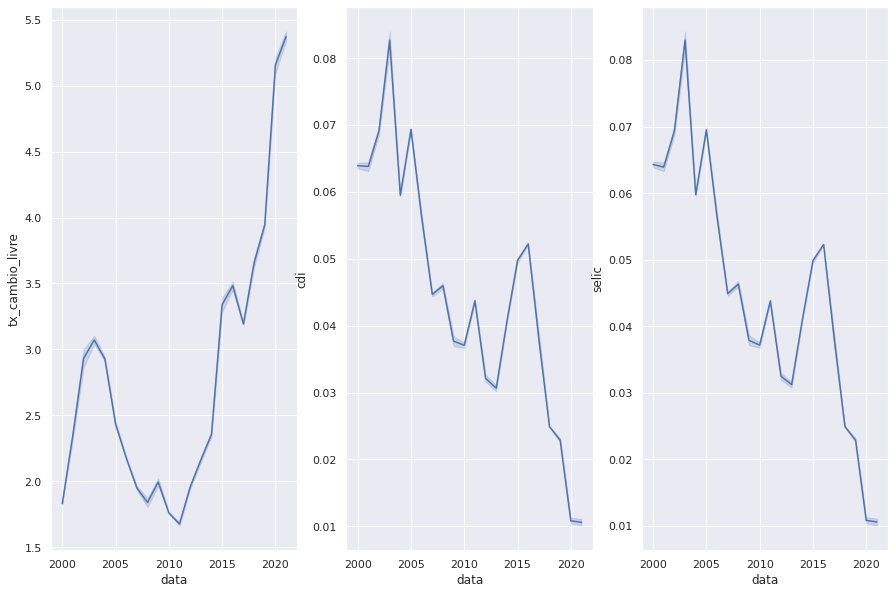

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
sns.lineplot(data = bcb_2000, x = bcb_2000.data.dt.year, y = "tx_cambio_livre")

plt.subplot(1, 3, 2)
sns.lineplot(data = bcb_2000, x = bcb_2000.data.dt.year, y = "cdi")

plt.subplot(1, 3, 3)
sns.lineplot(data = bcb_2000, x = bcb_2000.data.dt.year, y = "selic")

In [ ]:
bcb_2000.head()

,data,cdi,selic,tx_cambio_livre
3378,2000-01-03,0.068318,0.069186,1.8011
3379,2000-01-04,0.068218,0.069186,1.8337
3380,2000-01-05,0.068184,0.069220,1.8544
3381,2000-01-06,0.068218,0.069286,1.8461
3382,2000-01-07,0.068218,0.069286,1.8281


In [ ]:
# exportar base 
bcb_2000.to_excel('/content/drive/MyDrive/00_Adglow/BCB/bcb_2000.xlsx')

#### Filtro a partir de 2020

In [ ]:
bcb_2020 = bcb.loc[bcb.data >= '2020-01-01']
bcb_2020.head()

,data,cdi,selic,tx_cambio_livre
8402,2020-01-02,0.017089,0.017089,4.0213
8403,2020-01-03,0.017089,0.017089,4.0522
8404,2020-01-06,0.017089,0.017089,4.0554
8405,2020-01-07,0.017089,0.017089,4.0841
8406,2020-01-08,0.017089,0.017089,4.0672


In [ ]:
bcb_2020.tail()

,data,cdi,selic,tx_cambio_livre
8777,2021-07-02,0.016137,0.016137,5.0293
8778,2021-07-05,0.016137,0.016137,5.0749
8779,2021-07-06,0.016137,0.016137,5.1645
8780,2021-07-07,0.016137,0.016137,5.2328
8781,2021-07-08,0.016137,0.016137,5.2587


In [ ]:
bcb_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 8402 to 8781
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             380 non-null    datetime64[ns]
 1   cdi              380 non-null    float64       
 2   selic            380 non-null    float64       
 3   tx_cambio_livre  380 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 14.8 KB


In [ ]:
bcb_2020_val_uni = valores_unicos(bcb_2020)
bcb_2020_val_uni

,data,cdi,selic,tx_cambio_livre
0,380,8,8,373


In [ ]:
corr_bcb_2020 = bcb_2020.corr()
corr_bcb_2020

,cdi,selic,tx_cambio_livre
cdi,1.000000,1.000000,-0.705739
selic,1.000000,1.000000,-0.705739
tx_cambio_livre,-0.705739,-0.705739,1.000000


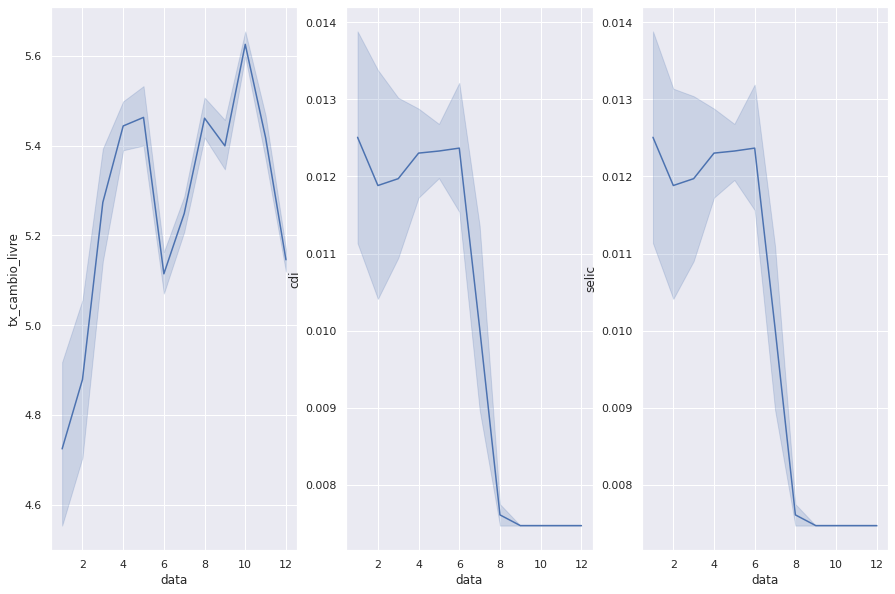

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
sns.lineplot(data = bcb_2020, x = bcb_2020.data.dt.month, y = "tx_cambio_livre")

plt.subplot(1, 3, 2)
sns.lineplot(data = bcb_2020, x = bcb_2020.data.dt.month, y = "cdi")

plt.subplot(1, 3, 3)
sns.lineplot(data = bcb_2020, x = bcb_2020.data.dt.month, y = "selic")

In [ ]:
# exportar base 
bcb_2020.to_excel('/content/drive/MyDrive/00_Adglow/BCB/bcb_2020.xlsx')

In [ ]:
bcb_2020.to_csv('/content/drive/MyDrive/00_Adglow/BCB/bcb_2020.csv')

####Comparando as Correlações das Bases 'bcb', 'bcb_2000' e 'bcb_2020'

In [ ]:
corr_bcb

,cdi,selic,tx_cambio_livre
cdi,1.000000,0.991467,0.294649
selic,0.991467,1.000000,0.299546
tx_cambio_livre,0.294649,0.299546,1.000000


In [ ]:
corr_bcb_2000

,cdi,selic,tx_cambio_livre
cdi,1.000000,0.999920,-0.379575
selic,0.999920,1.000000,-0.383298
tx_cambio_livre,-0.379575,-0.383298,1.000000


In [ ]:
corr_bcb_2020

,cdi,selic,tx_cambio_livre
cdi,1.000000,1.000000,-0.705739
selic,1.000000,1.000000,-0.705739
tx_cambio_livre,-0.705739,-0.705739,1.000000


> conforme diminuímos o período, obsevamos que a estatisticamente as taxas Selic e CDI são praticamente a mesma coisa e que a correlação negativa da taxa de câmbio livre em relação a Selic e CDI se acentua